<a href="https://colab.research.google.com/github/andrenp2/FinancialStudyPython/blob/master/Invest0102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I - Importando Bibliotecas

In [53]:
import numpy as np                # biblioteca matematica
import pandas as pd               # dados / data science
import matplotlib.pyplot as plt   # plotagem grafica 
import pandas_datareader as web   # leitor de dados 'online' 

# para corrigir a leitura dos dados do pandas utilizaremos o seguinte comando
# como é digitado " ! bla bla " sera executado no proprio terminal do notebook py.

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf             # corrigir a leitura dos dados do yahoofinance 

yf.pdr_override()                 # subescrevera corrigindo os dados (ithink)


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


***Importamos as bibliotecas conhecidas do Python... A pandas para dados, numpy para matematica, matplotlib.pyplot para plotagem grafica e pandas_datareader para a leitura dos daods. Por fim importamos a biblioteca yfinance que nos entrega os dados do Yahoo Finance. Por final, o comando yf.pdr_override() faz a correcao dos dados e reescreve para uma melhor leitura**

# II - Obtendo os dados do mercado

In [54]:
# criar uma variavel para chamar a "acao"

ibov = web.get_data_yahoo('^BVSP')

In [55]:
ibov.head() # mostrar os 5 primeiros da lista 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-25,53840.0,52879.0,53840.0,53176.0,3234900.0,53176.0
2015-06-26,54076.0,53151.0,53181.0,54017.0,2705400.0,54017.0
2015-06-29,54013.0,52647.0,54013.0,53014.0,2550600.0,53014.0
2015-06-30,53345.0,52813.0,53014.0,53081.0,3021100.0,53081.0
2015-07-01,53456.0,52603.0,53081.0,52758.0,2714000.0,52758.0


In [56]:
ibov.tail() # mostrar os 5 ultimos itens da lista 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-16,95216.0,92387.0,92387.0,93531.000000,12034200.0,93531.000000
2020-06-17,96611.0,93531.0,93531.0,95547.000000,11134700.0,95547.000000
2020-06-18,97110.0,94698.0,95547.0,96125.000000,10008500.0,96125.000000
2020-06-19,97540.0,95874.0,96138.0,96572.000000,13134400.0,96572.000000
2020-06-22,0.0,0.0,0.0,95335.960938,0.0,95335.960938


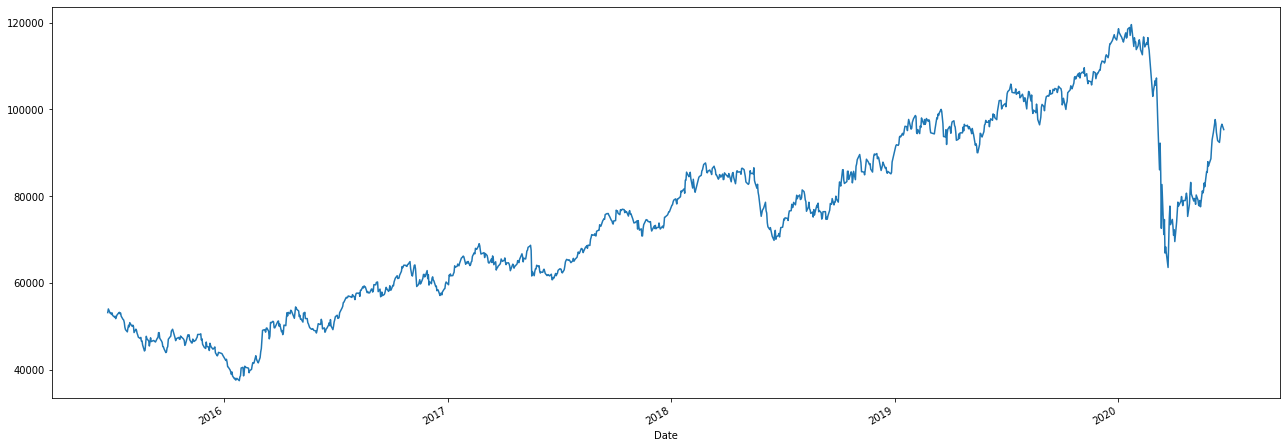

In [57]:
ibov["Close"].plot(figsize=(22,8))   # PLOTEI .plot A COLUNA ["Close"] de fechamento da bolsa, e o tamanho da figura

*** Primeiramente foi criado uma variavel com o nome da açao que queremos analisar, nesse caso IBOV (ibovespa). Entao, utilizamos a biblioteca pandas data_reader como web e a funcao get_data_yahoo("^NomeDaAcao"). Em seguida, os comandos variavel.head() ou variavel.tail() nos mostra respectivamente, os 5 primeiros dados e os 5 ultimos. Por final, plotamos a variavel ibov na coluna ["Close"] de fechamento da acao  ***


# III - Definindo intervalos, calculando e plotando medias moveis

***O que sao medias moveis? ***






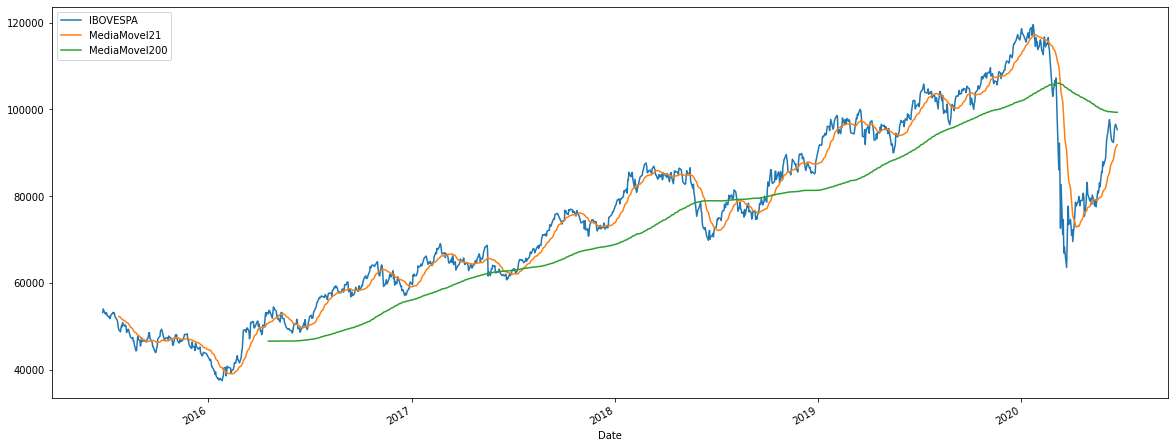

In [58]:
ibov["Close"].plot(figsize=(20,8),label="IBOVESPA")

ibov["Close"].rolling(21).mean().plot(label="MediaMovel21")                # Calcular a media movel de 21 dias.     
ibov["Close"].rolling(200).mean().plot(label="MediaMovel200")              # Calcular a media movel de 200 dias.

plt.legend()       # ativar legendas.



***Para diminuirmos um intervalo de tempo, para uma analise mais "precisa" podemos fatiar o grafico: ***

***Podemos fatiar o grafico para selecionar apenas o ano que desejamos analisar. basta chamar a variavel[variavel.index.year == ano], onde trocamos o "ano" pelo numero do ano ex: 2017***

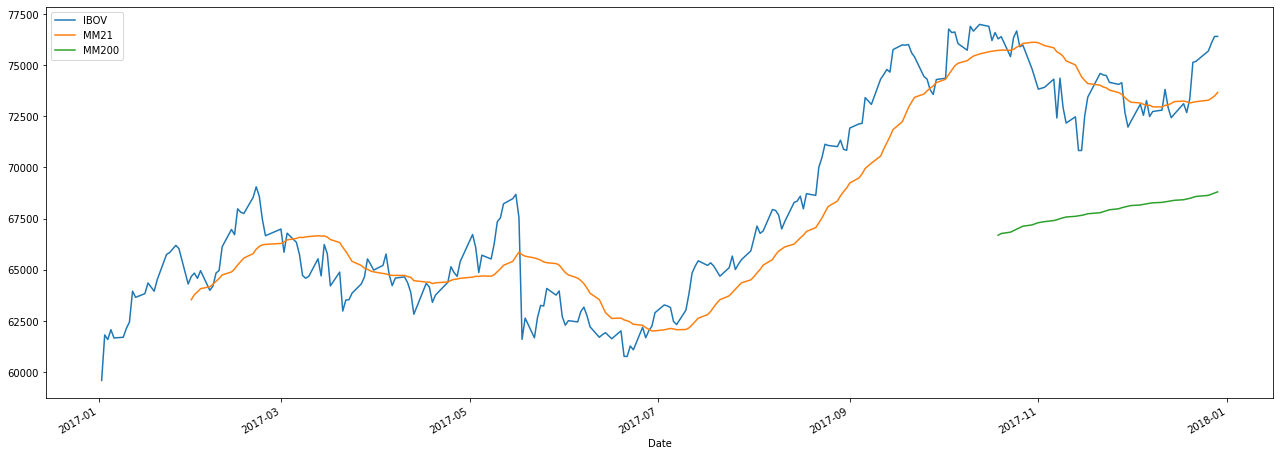

In [59]:
ibov_fatiado = ibov[ibov.index.year == 2017]

ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")

plt.legend()



***Podemos fazer o mesmo se quisermos analisar por um periodo, basta utilizar uma condicional***

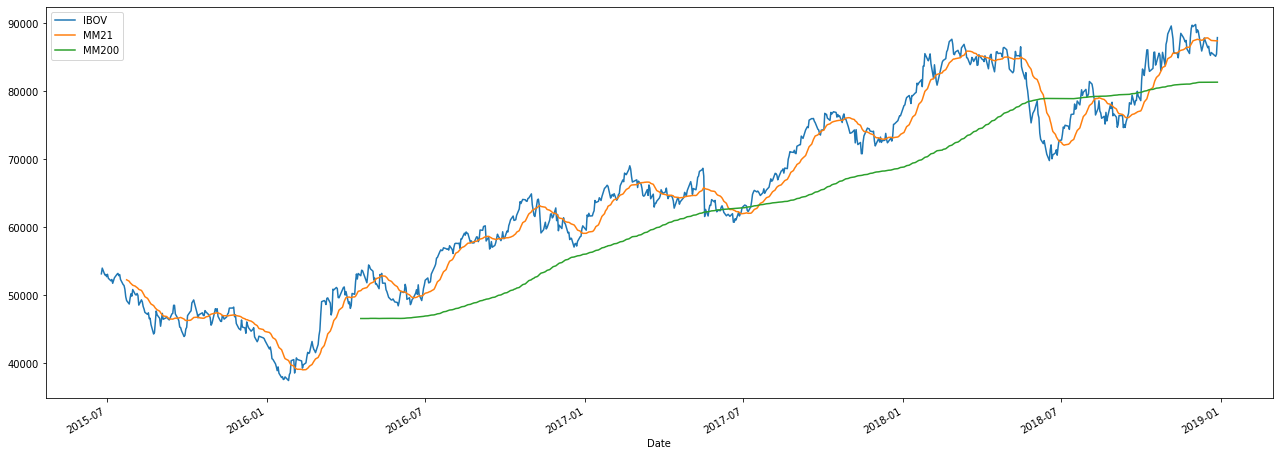

In [60]:
ibov_fatiado = ibov[(ibov.index.year >= 2015) & (ibov.index.year <= 2018)]

ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

***Tambem podemos analisar por meses, no caso seria trocar o ibov.index.year por ibov.index.month***

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-20,115171.0,114526.0,115133.0,115121.0,6887400.0,115121.0
2019-12-23,115863.0,114964.0,115119.0,115863.0,3995200.0,115863.0
2019-12-26,117220.0,115673.0,115864.0,117203.0,3788900.0,117203.0
2019-12-27,117803.0,115995.0,117205.0,116534.0,3905900.0,116534.0
2019-12-30,117086.0,115790.0,116530.0,115964.0,3667900.0,115964.0


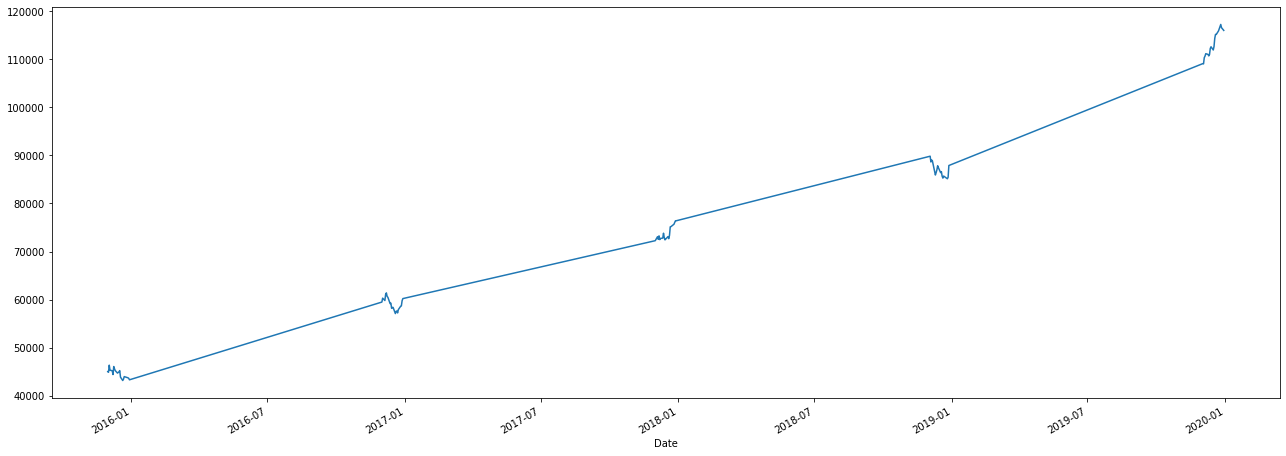

In [62]:
ibov_fatiado = ibov[ibov.index.month == 12]

ibov_fatiado["Close"].plot(figsize=(22,8))

ibov_fatiado.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-14,106758.0,105820.0,106052.0,106557.0,5364300.0,106557.0
2020-01-14,117705.0,116610.0,117325.0,117632.0,5361700.0,117632.0
2020-02-14,115663.0,114132.0,115663.0,114381.0,5335900.0,114381.0
2020-04-14,81668.0,78848.0,78848.0,79918.0,8593600.0,79918.0
2020-05-14,79011.0,75697.0,77770.0,79011.0,13818900.0,79011.0


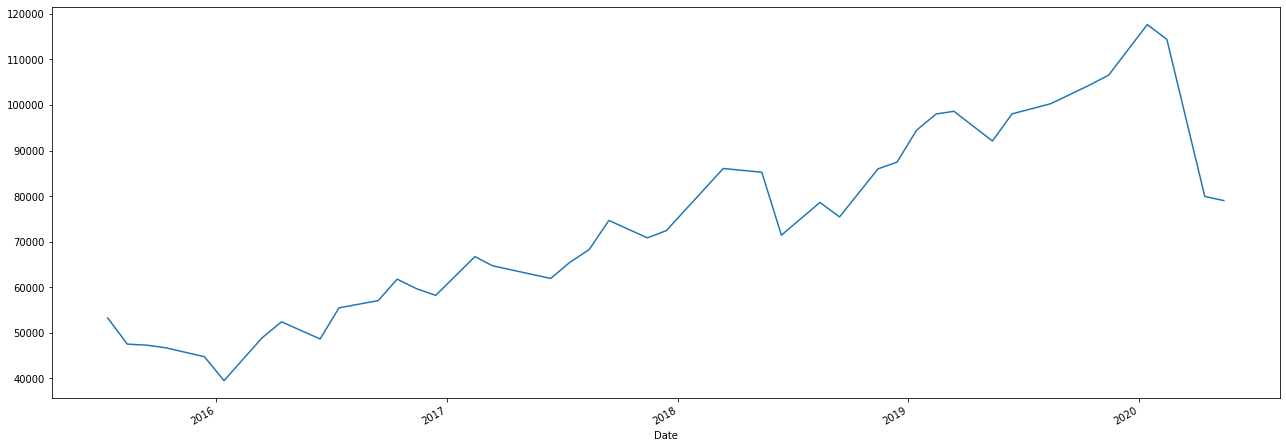

In [65]:
ibov_fatiado = ibov[ibov.index.day == 14]

ibov_fatiado["Close"].plot(figsize=(22,8),label="Dia14")

ibov_fatiado.tail()

***Eu posso tambem definir o periodo que eu quero na hora de baixar os dados do Yahoo Finance, por exemplo,     IBOV = web.get_data_yahoo('^VALE3.SA', start ='2010-05-03', end='2013-03-01') ***

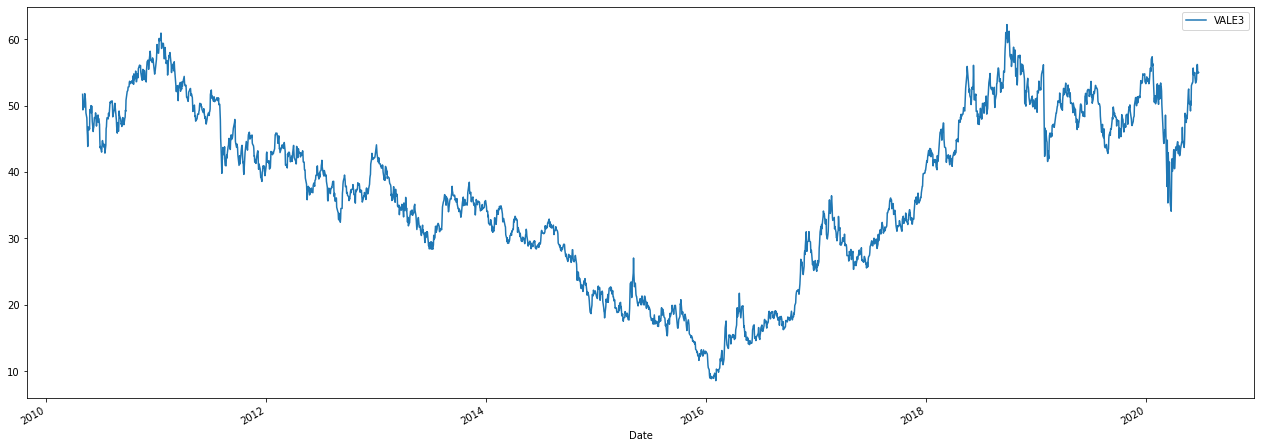

In [70]:
Vale = web.get_data_yahoo('VALE3.SA',start='2010-05-03', end='2020-06-22')

Vale["Close"].plot(figsize=(22,8),label="VALE3")
plt.legend()